In [2]:
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import numpy as np

from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import wcsaxes
from astropy.coordinates import SkyCoord
import astropy.units as u

from microfilm import colorify, microplot

## Data

First, we make a list where all the images are saved.
In my case I have the 4 images from HST specified in Sect. 2 of the master thesis

In [3]:
path = 'C:\\Users\\pablo\\Desktop\\TFM\\data\\HST\\'    # Where we have the images in our device
fileList = sorted(glob.glob(path+'*.fits'))             # Sorting the list by name

images = []                                             # Loop for saving the data corresponding to each image in this list
for i in range(len(fileList)):
    # From each FITS we work on the 2nd element, which is the SCI
    hdu = fits.open(fileList[i])
    data = hdu[1].data
    images.append(data)

In [4]:
wHST = WCS(hdu[1].header) # This is the projection we'll use when ploting these images
                          # Make sure the transformation between pixel and celestial coordinates is the same for all images
                          # If not, you must have a wcs for each image

## Making RGB

In [5]:
r, g, b = images[3], images[2], images[0]                   # Images we are going to use to make the RGB image
r_limits, g_limits, b_limits = [0, 0.5], [0, 10], [2, 5]    # Limits for each one

r, g and b are black and white images. We want that they have the colour that labell each one, and that is what we
are going to do below. For each one, we obtain a single colour image, a cmap, and the minimum and maximum values.
E.g., im_g is entirely made by green tones.

In [6]:
im_g, cmap_g, min_max_g = colorify.colorify_by_name(g, cmap_name='pure_green', flip_map=False, rescale_type='limits', limits=g_limits)
im_r, cmap_r, min_max_r = colorify.colorify_by_name(r, cmap_name='pure_red', flip_map=False, rescale_type='limits', limits=r_limits)
im_b, cmap_b, min_max_b = colorify.colorify_by_name(b, cmap_name='pure_blue', flip_map=False, rescale_type='limits', limits=b_limits)

The command "combina_image" combines the three single colour images and gives you the resulting RGB image

In [7]:
rgb = colorify.combine_image([im_r, im_g, im_b])   # rgb is an array that we can plot simply with imshow

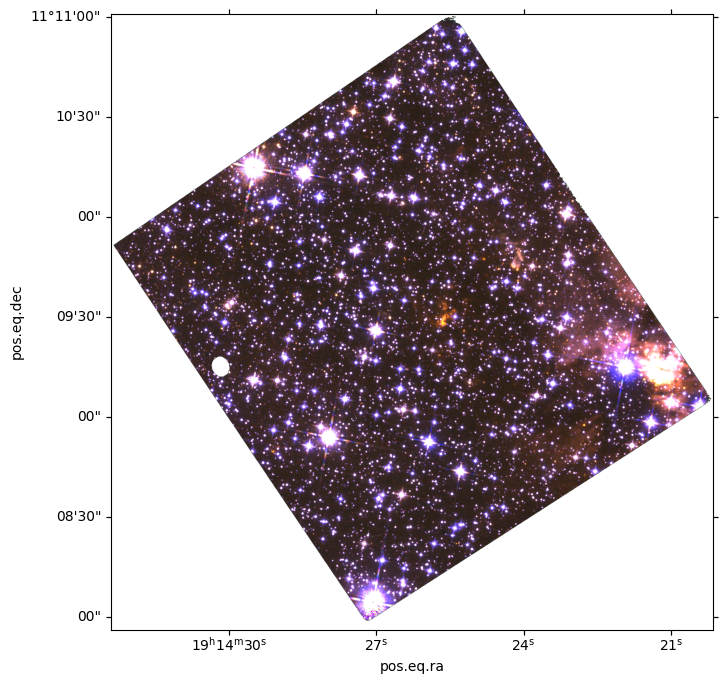

In [8]:
plt.figure(figsize=(8,8))
ax = plt.subplot(projection=wHST)   # This is what makes the axis to be recongnised as celestial coordinates
plt.imshow(rgb, origin = 'lower')